In [146]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
#import gc
#import tensorflow as tf

In [147]:
model = YOLO("./runs/detect/train13/weights/best.pt")
# load on NVIDIA GPU (do only if available)
model.to('cuda')

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_s

In [148]:

# Load an image
#image_path = './data/PKLot/PKLot/PUCPR/Rainy/2012-09-16/2012-09-16_07_32_58.jpg'
#image_path = './data/PKLot/PKLot/PUCPR/Rainy/2012-10-23/2012-10-23_08_15_50.jpg'
image_path = './data/unseen_test/test1.jpg'
#image_path = './data/unseen_test/test2.jpg'
#image_path = './data/unseen_test/test3.jpg'
#image_path = './data/unseen_test/test4.jpg'
#image_path = './data/unseen_test/test5.jpg'
#image_path = './data/unseen_test/test6.jpg'
image = cv2.imread(image_path)


In [149]:
# original yolo classes - do not work with transfer learning
# 1: 'bicycle',
# 2: 'car',
# 3: 'motorcycle',
# 4: 'airplane',
# 5: 'bus',
# 6: 'train',
# 7: 'truck',
# Perform inference

# force model to use cpu even if trained on gpu with line 1 otherwise do prediction on 
#results = model(image, conf=0.7, device='cpu') # [1, 2, 3, 5, 7], augment=True
results = model(image, conf=0.1, iou=0.2) # [1, 2, 3, 5, 7], augment=True



0: 384x640 42 emptys, 72 cars, 22.5ms
Speed: 5.0ms preprocess, 22.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


In [150]:
# see how many objects are predicted in total and extract results in right format
result = results[0]
len(result.boxes)

114

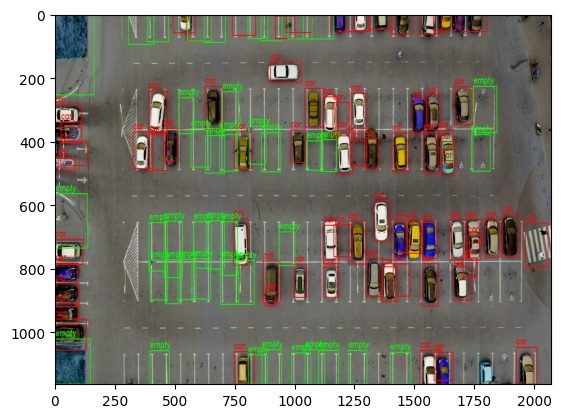

In [151]:
# plot predictions in loaded image
for box in result.boxes:
  class_id = result.names[box.cls[0].item()]
  if True: # class_id == 'car' or class_id == 'truck' or class_id == 'bus':
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    # print("Object type:", class_id)
    # print("Coordinates:", cords)
    # print("Probability:", conf)
    # print("---")
    
    # Split coordinates
    x1, y1, x2, y2 = cords
    
    if class_id == 'empty':
      color = (0, 255, 0)
    else:
      color = (255, 0, 0)
    
    # Draw rectangle (bounding box)
    cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)

    # Put class label on the rectangle
    cv2.putText(image, str(class_id), (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)
  
# Save or display the image
plt.imshow(image, aspect='auto')
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [152]:
result.names

{0: 'empty', 1: 'car'}

In [153]:
# Free RAM and VRAM
#gc.collect()
#tf.keras.backend.clear_session()